In [2]:
#imorting necessary libraries
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

In [5]:
#using pandas to read the training and test data
data = pd.read_excel("C:/Users/HCL/Desktop/Desktop Programs/FTPP/train.xlsx")

In [7]:
#displaying the first and last 5 rows of the data
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [9]:
data.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

#### the training data has 10,683 rows but 'Route', 'Total_Stops' have only 10,682 rows. This shows that there are some missing values in the dataset


# Starting the preliminary analysation of data

In [11]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
data.describe(include = "all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [17]:
data.info

<bound method DataFrame.info of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → 

## Identifying and dealing with Missing values

In [19]:
data.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [21]:
#To count how many missing values are there in the dataset in row as well as column
data.isnull().sum().sum()

2

In [23]:
#To count how many missing values are there in the dataset column wise
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# Data Cleaning

In [26]:
data = data.fillna(data['Route'].value_counts().index[0])
data.isnull().sum().sum()

0

### Now we have cleaned our data

# These factors directly affect the price of airline tickets:
### 1. Airline
### 2. Date of journey
### 3. Route
### 4. Duration
### 5. Total stops

# Data Formatting

In [29]:
data.head()

,Airline,Date_of_Journey,Route,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,BLR → DEL,2h 50m,non-stop,3897
1,Air India,1/05/2019,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,DEL → LKO → BOM → COK,19h,2 stops,13882
3,IndiGo,12/05/2019,CCU → NAG → BLR,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,BLR → NAG → DEL,4h 45m,1 stop,13302


In [31]:
data.dtypes

Airline            object
Date_of_Journey    object
Route              object
Duration           object
Total_Stops        object
Price               int64
dtype: object

### we can see that Airline, Date_of_Journey, Route, Duration and Total Stops are not numerical or integer data type

# Formatting Airline Columns

In [33]:
# All different unique airlines
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [35]:
# Showing details according to airlines

filter = data['Airline']=="Jet Airways"
data.where(filter).count()

Airline            3849
Date_of_Journey    3849
Route              3849
Duration           3849
Total_Stops        3849
Price              3849
dtype: int64

In [37]:
# Encoding airline categorical values to numerical values
le = LabelEncoder()
data['Airline'] = le.fit_transform(data['Airline'])

In [40]:
data['Airline'].unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9], dtype=int64)

In [42]:
data.head()

,Airline,Date_of_Journey,Route,Duration,Total_Stops,Price
0,3,24/03/2019,BLR → DEL,2h 50m,non-stop,3897
1,1,1/05/2019,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662
2,4,9/06/2019,DEL → LKO → BOM → COK,19h,2 stops,13882
3,3,12/05/2019,CCU → NAG → BLR,5h 25m,1 stop,6218
4,3,01/03/2019,BLR → NAG → DEL,4h 45m,1 stop,13302


In [44]:
# To verify Jet Airways is now termed as 4

filter = data['Airline']==4
data.where(filter).count()

Airline            3849
Date_of_Journey    3849
Route              3849
Duration           3849
Total_Stops        3849
Price              3849
dtype: int64

## formatting date_of_journey

### we need to split it into date, month, and year

In [46]:
data['Date'] = data['Date_of_Journey'].str.split('/').str[0]
data['Month'] = data['Date_of_Journey'].str.split('/').str[1]
data['Year'] = data['Date_of_Journey'].str.split('/').str[2]

In [48]:
# Now convert them into int type
data['Date'] = data['Date'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Year'] = data['Year'].astype(int)

In [53]:
data.head()

,Airline,Route,Duration,Total_Stops,Price,Date,Month,Year
0,3,BLR → DEL,2h 50m,non-stop,3897,24,3,2019
1,1,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,2019
2,4,DEL → LKO → BOM → COK,19h,2 stops,13882,9,6,2019
3,3,CCU → NAG → BLR,5h 25m,1 stop,6218,12,5,2019
4,3,BLR → NAG → DEL,4h 45m,1 stop,13302,1,3,2019


### Formatting duration
#### We need to deal with alphabet 'h' and 'm' alongwith whitespace

In [55]:
D = []
for i in data['Duration']:
    for j in range(0,len(i)):
        i=str(i).replace('h','')
        i=str(i).replace('m','')
        i = str(i).replace(' ','')
    D.append(i)
data['Duration_Mins'] = D
data.head()

,Airline,Route,Duration,Total_Stops,Price,Date,Month,Year,Duration_Mins
0,3,BLR → DEL,2h 50m,non-stop,3897,24,3,2019,250
1,1,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,2019,725
2,4,DEL → LKO → BOM → COK,19h,2 stops,13882,9,6,2019,19
3,3,CCU → NAG → BLR,5h 25m,1 stop,6218,12,5,2019,525
4,3,BLR → NAG → DEL,4h 45m,1 stop,13302,1,3,2019,445


In [57]:
data.dtypes

Airline           int64
Route            object
Duration         object
Total_Stops      object
Price             int64
Date              int32
Month             int32
Year              int32
Duration_Mins    object
dtype: object

In [59]:
# Converting object type to integer data type
data['Duration_Mins'] = data['Duration_Mins'].astype(int)

In [61]:
# Finally converting hours into minutes

for i in range(0,len(data['Duration_Mins'])):
  if len(str(data['Duration_Mins'][i]))<=2:
    data['Duration_Mins'][i]*=60
  else:
    new=0
    s=''
    res = list(map(int, str(data['Duration_Mins'][i])))
    new=res[0]*60
    res.pop(0)
    for j in res:
      s=s+str(j)
    m=int(s)
    new = new + m
    data['Duration_Mins'][i]=new

C:\Users\HCL\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\HCL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [65]:
# after Dropping original Duration column
data.head()

,Airline,Route,Total_Stops,Price,Date,Month,Year,Duration_Mins
0,3,BLR → DEL,non-stop,3897,24,3,2019,130
1,1,CCU → IXR → BBI → BLR,2 stops,7662,1,5,2019,285
2,4,DEL → LKO → BOM → COK,2 stops,13882,9,6,2019,200
3,3,CCU → NAG → BLR,1 stop,6218,12,5,2019,205
4,3,BLR → NAG → DEL,1 stop,13302,1,3,2019,205


### Formatting total stops

In [67]:
for i in range(len(data['Total_Stops'])):
  if data['Total_Stops'][i]=='non-stop':
    data['Total_Stops'][i]='0'
  elif data['Total_Stops'][i]=='2 stops':
    data['Total_Stops'][i]='2'
  else:
    data['Total_Stops'][i]='1'

C:\Users\HCL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [69]:
# Converting object type to integer data type
data['Total_Stops'] = data['Total_Stops'].astype(int)

In [71]:
data.head()

,Airline,Route,Total_Stops,Price,Date,Month,Year,Duration_Mins
0,3,BLR → DEL,1,3897,24,3,2019,130
1,1,CCU → IXR → BBI → BLR,1,7662,1,5,2019,285
2,4,DEL → LKO → BOM → COK,1,13882,9,6,2019,200
3,3,CCU → NAG → BLR,1,6218,12,5,2019,205
4,3,BLR → NAG → DEL,1,13302,1,3,2019,205


In [73]:
data.dtypes

Airline           int64
Route            object
Total_Stops       int32
Price             int64
Date              int32
Month             int32
Year              int32
Duration_Mins     int32
dtype: object

### Formatting Route
#### Here I have used length function to distinguish if route is direct then its value is 0

In [76]:
# To know the different values so that I convert them easily to 3 different categories

for i in range(len(data['Route'])):
  print(len(str(data['Route'][i])))
  if i==10:
    break

9
21
21
15
15
9
15
15
15
15
15


In [78]:
for i in range(len(data['Route'])):
  if len(str(data['Route'][i]))==9:
    data['Route'][i]=0
  elif len(str(data['Route'][i]))==15:
    data['Route'][i]=1
  else:
    data['Route'][i]=2

C:\Users\HCL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [80]:
# Converting object type to integer data type
data['Route'] = data['Route'].astype(int)

In [82]:
data.dtypes

Airline          int64
Route            int32
Total_Stops      int32
Price            int64
Date             int32
Month            int32
Year             int32
Duration_Mins    int32
dtype: object

# Data Visualization

In [84]:
data.head()

,Airline,Route,Total_Stops,Price,Date,Month,Year,Duration_Mins
0,3,2,1,3897,24,3,2019,130
1,1,2,1,7662,1,5,2019,285
2,4,2,1,13882,9,6,2019,200
3,3,2,1,6218,12,5,2019,205
4,3,2,1,13302,1,3,2019,205


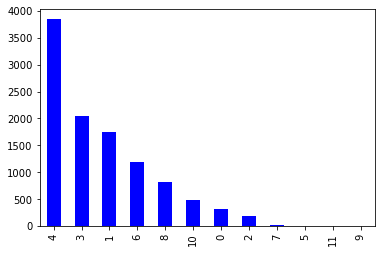

In [87]:
data['Airline'].value_counts().plot(kind='bar', color='blue')

#### This shows that Jet Airways (labelled as 4) has the max number of bookings

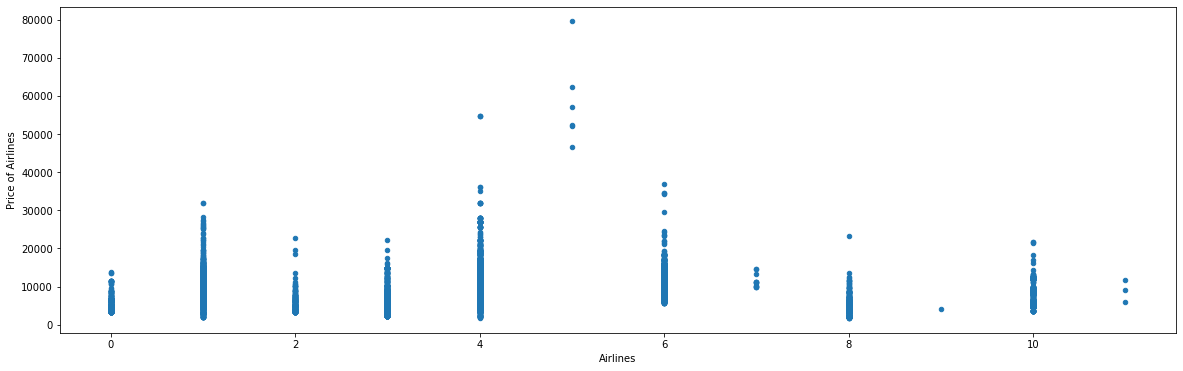

In [89]:
ax = data.plot.scatter('Airline',y='Price', figsize=(20,6))
plt.xlabel('Airlines')
plt.ylabel('Price of Airlines')
plt.show()

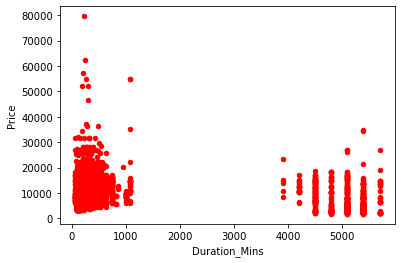

In [92]:
ax1 = data.plot.scatter('Duration_Mins','Price', color='red')

#### From the above graph it is quite clear that flights with less travel time i.e. Duration_Mins are booked by maximum number of users.

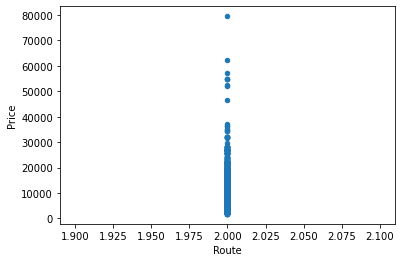

In [94]:
ax1 = data.plot.scatter('Route','Price')

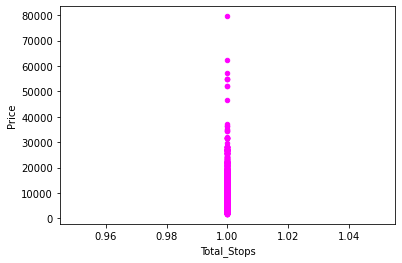

In [96]:
ax1 = data.plot.scatter('Total_Stops','Price', color='magenta')

#### It is very obvious that flight with 0 stop or non-stop flights are cheaper than with 1 or 2 stops.

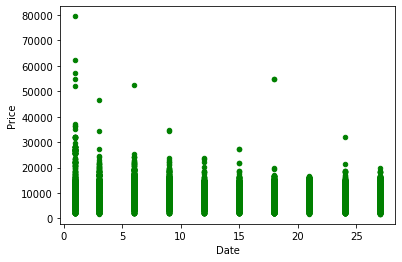

In [98]:
ax1 = data.plot.scatter('Date','Price',color='green')

# Data Normalization

In [100]:
data.head()

,Airline,Route,Total_Stops,Price,Date,Month,Year,Duration_Mins
0,3,2,1,3897,24,3,2019,130
1,1,2,1,7662,1,5,2019,285
2,4,2,1,13882,9,6,2019,200
3,3,2,1,6218,12,5,2019,205
4,3,2,1,13302,1,3,2019,205


## Train_Test_Split

In [102]:
y = data['Price']
x = data.drop(['Price'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=4)

In [104]:
df_train = data

## Feature Scaling

In [106]:
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(x_train)
mm_scaler.transform(x_test)

array([[0.54545455, 0.        , 0.        , ..., 0.66666667, 0.        ,
        0.03457447],
       [0.09090909, 0.        , 0.        , ..., 1.        , 0.        ,
        0.05939716],
       [0.54545455, 0.        , 0.        , ..., 1.        , 0.        ,
        0.03457447],
       ...,
       [0.09090909, 0.        , 0.        , ..., 1.        , 0.        ,
        0.07358156],
       [0.27272727, 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.00975177],
       [0.54545455, 0.        , 0.        , ..., 1.        , 0.        ,
        0.03900709]])

## Principal component analysis

In [108]:
# Make an instance of the Model
pca = PCA()

In [110]:
x_train = pd.DataFrame(pca.fit_transform(x_train))
x_test = pd.DataFrame(pca.transform(x_test))

In [112]:
explained_variance = pca.explained_variance_ratio_

In [114]:
explained_variance

array([9.99959385e-01, 3.71011051e-05, 2.82186441e-06, 6.91728371e-07,
       2.09612639e-36, 1.58384478e-41, 0.00000000e+00])

# Data Modeling

## Random Forest

In [116]:
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [118]:
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

In [120]:
display(regressor.score(x_test,y_test))

0.6779461041486589

In [122]:
display(regressor.score(x_train,y_train))

0.8801790238325702

In [128]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('Train data\n')
print("Absolute Error = ",mean_absolute_error(y_pred_train,y_train))
print("Mean percentage error = ",mean_absolute_percentage_error(y_pred_train,y_train))
print("\nTest data\n")
print("Absolute Error = ",mean_absolute_error(y_pred_test,y_test))
print("Mean percentage error = ",mean_absolute_percentage_error(y_pred_test,y_test))

Train data

Absolute Error =  1013.6094007287461
Mean percentage error =  10.769132546212912

Test data

Absolute Error =  1747.8015807707347
Mean percentage error =  18.615181507090647


### Linear Regression

In [130]:
lr = LinearRegression() 
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
#Predicting the test set result using  
# predict function under LinearRegression
y_pred_test = lr.predict(x_test) 
y_pred_train = lr.predict(x_train)

In [137]:
len(y_pred_test)

3561

In [139]:
display(lr.score(x_train,y_train))

0.053726257336568994

In [141]:
display(lr.score(x_test,y_test))

0.06896788450219282

In [143]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('Train data\n')
print("Absolute Error = ",mean_absolute_error(y_pred_train,y_train))
print("Mean percentage error = ",mean_absolute_percentage_error(y_pred_train,y_train))
print("\nTest data\n")
print("Absolute Error = ",mean_absolute_error(y_pred_test,y_test))
print("Mean percentage error = ",mean_absolute_percentage_error(y_pred_test,y_test))

Train data

Absolute Error =  3599.537167222357
Mean percentage error =  39.75675358835725

Test data

Absolute Error =  3526.3877201195896
Mean percentage error =  38.6961697515322
